<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [3]:
import pandas as pd
reviews = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [9]:
reviews.shape

(28332, 24)

In [17]:
revs = reviews['reviews.text']
rating = reviews['reviews.rating']
print(rating[0])
revs[0]

3


'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [21]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
X_train, X_test, y_train, y_test = train_test_split(reviews['reviews.text'], reviews['reviews.rating'], test_size=0.33, random_state=42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18982,) (9350,) (18982,) (9350,)


(18982, 3259)


In [25]:
params_1 = {
    'min_samples_leaf': [1, 2, 5, 10]
}

# Instantiate classifier
clf = RandomForestClassifier()

# GridSearch
gs1 = GridSearchCV(clf, params_1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [32]:
X_train

14632    Great device very functional love it will reco...
24806    She loves it, plays with it everyday all day. ...
4113                                      last a long time
5326                             Great packaging and value
14492    Nice tablet, gives different choices for reade...
                               ...                        
21575    This tablet is great for browsing the internet...
5390                Can't beat the price for 48 batteries.
860          Batteries work as good as any other big brand
15795    Was looking for a tablet with expandable memor...
23654    I like that I can control the time and content...
Name: reviews.text, Length: 18982, dtype: object

In [34]:
from sklearn.pipeline import Pipeline

# 1. Create a pipeline with a vectorize and a classifier
# 2. Use Grid Search to optimize the entire pipeline
pipe = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

params_2 = {
    'vect__stop_words': (None, 'english'), 
    'vect__min_df': (2, 5),
    'clf__max_depth': (10, None)
}

gs2 = GridSearchCV(pipe, params_2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [38]:
reviews['reviews.text']

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 28332, dtype: object

In [ ]:
# # Instantiate vectorizer
# vect = TfidfVectorizer(min_df=5)

# # Transform the training data
# X_train = vect.fit_transform(X_train)
# print(X_train.shape)

In [40]:
df=pd.DataFrame({'revs':reviews['reviews.text'], 'rating':reviews['reviews.rating']})
print(rating[0])
print(revs[0])
df.head()

3
I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.


,revs,rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


In [42]:
nlp = spacy.load("en_core_web_lg")
from tqdm import tqdm
tqdm.pandas()


In [43]:
# Create 'lemmas' column
def get_lemmas(x):
    lemmas = []
    for token in nlp(x):
        if (token.is_stop!=True) and (token.is_punct!=True):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['revs'].progress_apply(get_lemmas)

100%|██████████████████████████████████████| 28332/28332 [05:06<00:00, 92.58it/s]


In [44]:
df.head()

,revs,rating,lemmas
0,I order 3 of them and one of the item is bad q...,3,"[order, 3, item, bad, quality, miss, backup, s..."
1,Bulk is always the less expensive way to go fo...,4,"[bulk, expensive, way, product, like]"
2,Well they are not Duracell but for the price i...,5,"[Duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,5,"[work, brand, battery, well, price]"
4,These batteries are very long lasting the pric...,5,"[battery, long, last, price, great]"


In [45]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemmas'])

In [46]:
# How many words do we have?
len(id2word.keys())

9727

In [47]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=3, no_above=0.75)

In [48]:
# How many words do we have?
len(id2word.keys())

4564

In [49]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [50]:
id2word[109]

'know'

In [52]:
df.iloc[5]['revs']

"Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again."

In [53]:
corpus[5]

[(4, 2),
 (20, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1)]

In [55]:
id2word[4]

'battery'

In [56]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[('battery', 2),
 ('brand', 2),
 ('Amazon', 1),
 ('AmazonBasics', 1),
 ('Basic', 1),
 ('Cell', 1),
 ('Christmas', 1),
 ('arrive', 1),
 ('buy', 2),
 ('difference', 1),
 ('easy', 1),
 ('good', 1),
 ('hand', 1),
 ('house', 1),
 ('lot', 2),
 ('notice', 1),
 ('purchase', 1)]

In [57]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=20, 
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics=True)

Wall time: 1min 5s


In [58]:
lda_model.save('lda_model.model')

In [59]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)

# https://radimrehurek.com/gensim/models/ldamulticore.html

Wall time: 32.8 s


In [60]:
from gensim import models
lda =  models.LdaModel.load('lda_model.model')

In [61]:
# View the top 10 words per topic
pprint(lda.print_topics())

[(0,
  '0.589*"easy" + 0.120*"quality" + 0.065*"item" + 0.049*"amazing" + '
  '0.033*"affordable" + 0.031*"update" + 0.024*"bad" + 0.020*"everyday" + '
  '0.018*"difference" + 0.012*"consider"'),
 (1,
  '0.317*"nice" + 0.178*"light" + 0.125*"think" + 0.103*"price" + '
  '0.101*"excellent" + 0.049*"fit" + 0.042*"performance" + 0.040*"ok" + '
  '0.007*"arrive" + 0.000*"tablet"'),
 (2,
  '0.250*"purchase" + 0.214*"year" + 0.102*"well" + 0.081*"child" + '
  '0.077*"store" + 0.043*"way" + 0.033*"sure" + 0.025*"not" + 0.022*"compare" '
  '+ 0.020*"let"'),
 (3,
  '0.526*"buy" + 0.198*"play" + 0.057*"replace" + 0.053*"right" + 0.038*"run" '
  '+ 0.029*"decide" + 0.019*"experience" + 0.010*"past" + 0.010*"way" + '
  '0.009*"buck"'),
 (4,
  '0.302*"work" + 0.256*"game" + 0.174*"great" + 0.125*"Christmas" + '
  '0.103*"far" + 0.009*"reasonable" + 0.008*"okay" + 0.003*"date" + '
  '0.000*"tablet" + 0.000*"old"'),
 (5,
  '0.236*"want" + 0.147*"son" + 0.133*"battery" + 0.099*"life" + '
  '0.076*"awe

In [62]:
# Extract Document-Topic distributions for each document in corpus
doc_lda = lda[corpus]
doc_lda[0][0]

[(0, 0.38125157), (4, 0.13125086), (6, 0.13124628), (14, 0.2562502)]

In [63]:
doc_lda[5][0]

[(0, 0.1605265),
 (1, 0.055238485),
 (2, 0.0552657),
 (3, 0.10790092),
 (4, 0.05526493),
 (5, 0.13579938),
 (10, 0.055266194),
 (11, 0.10790033),
 (12, 0.055266116),
 (14, 0.1326288),
 (16, 0.055257045)]

In [64]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, 
                                     texts=df['lemmas'], 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -16.55147961928525

Coherence Score:  0.4096211961220223


In [65]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
pyLDAvis.display(vis)

In [66]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [67]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=df['lemmas'], 
                                                        start=10, 
                                                        limit=41, 
                                                        step=5)

Wall time: 6min 23s


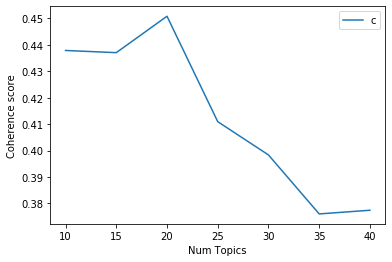

In [68]:
start=10; limit=41; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [69]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.4379
Num Topics = 15  has Coherence Value of 0.4371
Num Topics = 20  has Coherence Value of 0.4509
Num Topics = 25  has Coherence Value of 0.4109
Num Topics = 30  has Coherence Value of 0.3983
Num Topics = 35  has Coherence Value of 0.376
Num Topics = 40  has Coherence Value of 0.3774


In [76]:
# Select the model and print the topics
optimal_model = model_list[2]
optimal_model.save('optimal_model.model')
optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.205*"far" + 0.049*"work" + 0.043*"go" + 0.036*"complaint" + '
  '0.033*"portable" + 0.030*"keyboard" + 0.027*"issue" + 0.024*"strong" + '
  '0.021*"perform" + 0.021*"advertise"'),
 (1,
  '0.065*"purchase" + 0.055*"happy" + 0.053*"Christmas" + 0.039*"picture" + '
  '0.038*"card" + 0.038*"gift" + 0.032*"give" + 0.031*"storage" + '
  '0.031*"thank" + 0.030*"buy"'),
 (2,
  '0.297*"love" + 0.089*"buy" + 0.072*"gift" + 0.058*"kid" + 0.043*"free" + '
  '0.026*"beat" + 0.023*"case" + 0.021*"price" + 0.021*"family" + '
  '0.020*"durable"'),
 (3,
  '0.049*"price" + 0.030*"high" + 0.030*"sale" + 0.028*"low" + 0.025*"quality" '
  '+ 0.022*"look" + 0.021*"decent" + 0.018*"get" + 0.018*"unit" + '
  '0.017*"friend"'),
 (4,
  '0.085*"read" + 0.078*"book" + 0.051*"Fire" + 0.025*"Amazon" + 0.021*"8" + '
  '0.020*"like" + 0.019*"buy" + 0.015*"break" + 0.014*"new" + 0.014*"want"'),
 (5,
  '0.121*"battery" + 0.029*"Amazon" + 0.025*"order" + 0.024*"buy" + '
  '0.022*"time" + 0.015*"long" + 0.014*"

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling